# Computing in Chemistry

This demonstration aims to introduce how Python can be applied in a Chemistry context. We will focus on reactions and kinetics, by utilising a dataset and analysing it to visualise trends.

The data used in this demo has been taken from this GitHub repository: https://github.com/flboudoire/chemical-kinetics/blob/master/examples/simple_example/data/concentrations%20vs%20time.csv, with documentation here: https://chemical-kinetics.readthedocs.io/en/latest/index.html

---

## Concentration and time data

In this demo we will have a look at a set of data for a typical chemical reaction that might take place for a kinetics study, where the progress of the reaction is monitored over time. 

Some examples include the decomposition of hydrogen peroxide, or the iodine clock reaction, more detail of which can be found [here](https://chemguide.co.uk/physical/basicrates/experimental.html).

We will then determine the rate order of the reactant (zeroth, first, second), by plotting graphs from integrated rate laws (see the image). Here, $[A]_0$ is the initial concentration of reactant, $[A]$ is the concentration of reactant at a given time and $t$ is time. 

![reaction rates](reaction_rates.png)

(https://2012books.lardbucket.org/books/principles-of-general-chemistry-v1.0/s18-04-using-graphs-to-determine-rate.html)

Looking at these integrated rate laws, they might seem quite confusing at first, but these equations are actually just in a disguised $y = mx + c$ format and will give a linear plot if the right variables are being plotted. 

To explain this:

For a zeroth order reaction: 
- $[A] = - kt + [A]_0$
- We plot $[A]$ as our $y$ vs $t$ as our $x$
- The gradient is $-k$ (the negative of the rate constant)
- The $y$ intercept will be $[A]_0$.

For a first order reaction: 
- $ln([A]) = - kt + ln([A]_0)$ 
- We plot $ln([A])$ as our $y$ vs $t$ as our $x$
- The gradient is $-k$ (the negative of the rate constant)
- The $y$ intercept will be $ln([A]_0)$.

For a second order reaction: 
- $\frac{1}{[A]} = kt + \frac{1}{[A]_0}$
- We plot $\frac{1}{[A]}$ as our $y$ vs $t$ as our $x$
- The gradient is $+k$ (rate constant)
- The $y$ intercept will also be $\frac{1}{[A]_0}$

We will not go into the details of the integrations in this demo, but you can find out more about how these equations are derived here: https://chemistrytalk.org/integrated-rate-laws/

We will then use a statistical technique called the linear fit, or _linear regression_. This uses the data given to create a line of best fit for the graph, and we can then use this to extrapolate or predict data points outside the current given range, as well as interpolate (predicting data points within the range).
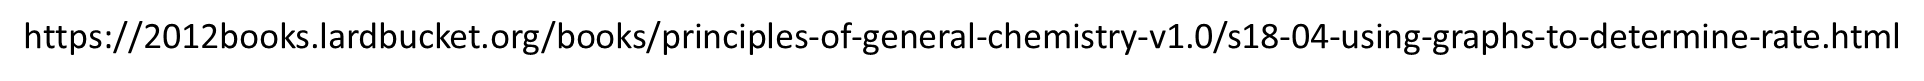
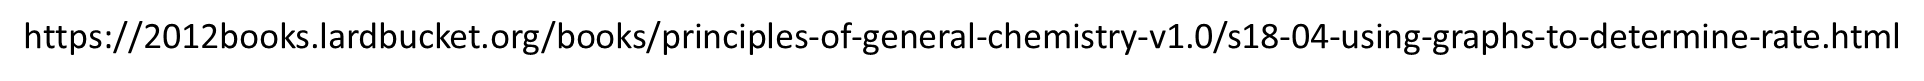
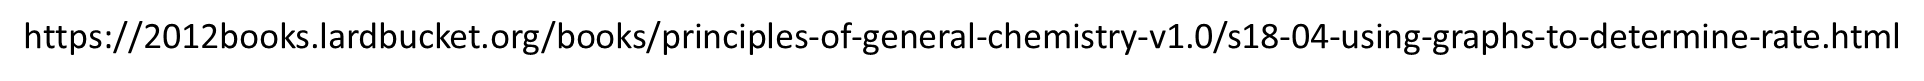
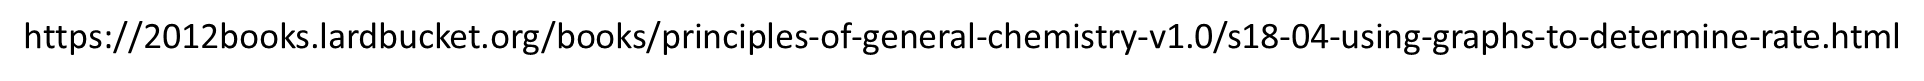
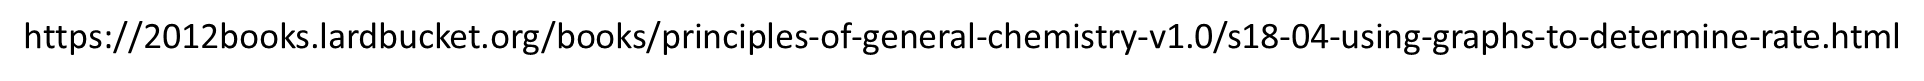
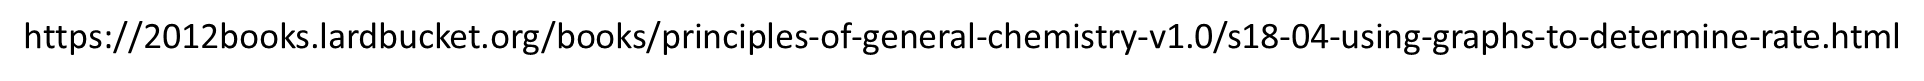
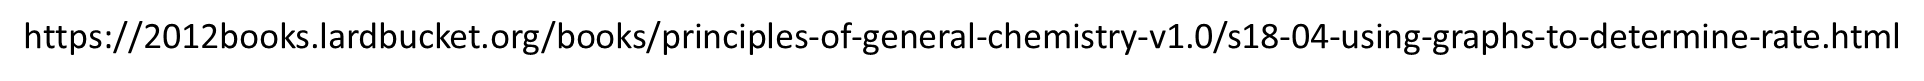
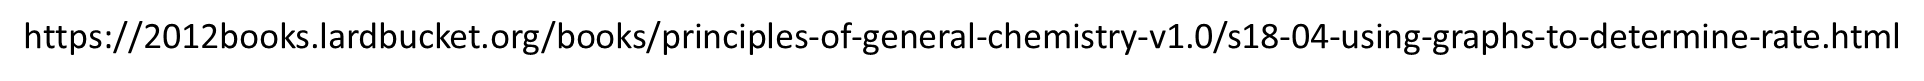
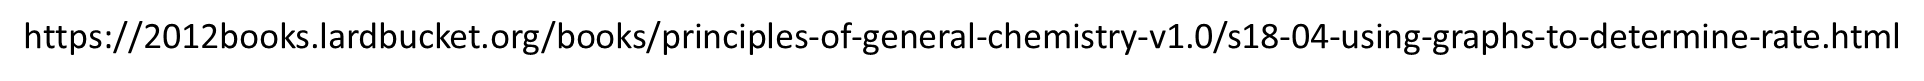
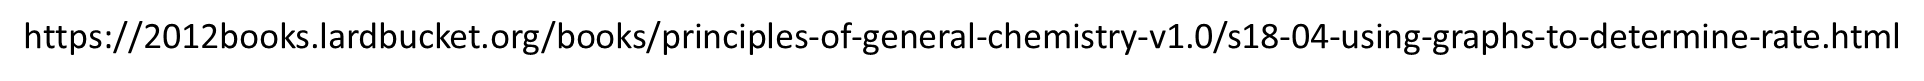
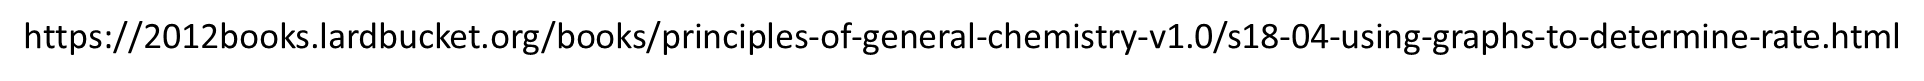
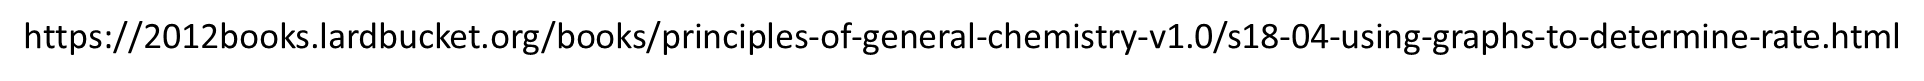

---

## How to use Jupyter

In Jupyter notebooks code can be run cell by cell. Cells are like textboxes which let you input code and comments, and the play button (⏵) lets you run cells individually. The fast forward button (⏩) lets you run the entire notebook. You can also press Shift+Enter to run cells individually.

The cells can be run as they are, but sometimes we'll also ask you to input some additional code, either in the same cell or in an additional specified cell before running.

---

## The data

**Skills: reading in data using `pandas`, basic plotting using `matplotlib`**

First, we will import the _libraries_ that we require - these are pre-written packages that have various different functionalities. Most of them are imported in the format `import X as Y`, where `X` is the full name of the library and `Y` is an abbreviation for it - you can put anything you want as the name for `Y`, but there is normally a naming convention for each library, such as `pandas` being shortened to `pd`, to create consistency across code.

You will notice that there is a _directory_ (folder) called "data". There are some files within it, which we will be analysing in this demo. They have been saved in a .csv (comma separated values) format, which makes it easy to process.

The library we will be using to read in this data is called `pandas` which derives its name from the term _panel data_, used in econometrics to refer to multi-dimensional structured data, often involving measurements over time. There is a specific function to do read data in a .csv format, `read_csv()`.

In [1]:
# Importing libraries
import pandas as pd

In [2]:
data_filename = "data/concentrations_vs_time.csv" # Create variable to store the filename
data = pd.read_csv(data_filename, sep = ",") # Read in the data using pandas, specifying that the values are separated by a comma

We have created a variable called `data` which contains a table of information that we have extracted from a file. We can preview the first few rows of the table using `.head()`.

In [3]:
data.head()

,time / s,[A] / mol dm⁻³
0,0.000000,0.931115
1,2.040816,0.871808
2,4.081633,0.689588
3,6.122449,0.523002
4,8.163265,0.463176


The dataset contains columns for time in seconds, and the concentrations in mol dm$^{-3}$ for 3 different compounds (arbitrarily named `A`, `B` and `C`). We can create variables for each of these columns and then plot them on a graph to look at the behaviour these compounds over time.

We will import another library, this time `matplotlib`. You will notice the `.pyplot` after it - this is a submodule within `matplotlib` specifically for creating common plots. You will notice there is another abbreviation, `plt` - this abbreviates the whole of `matplotlib.pyplot`, so when we write `plt.scatter()`, what we are really writing is `matplotlib.pyplot.scatter()`.

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Create variables for each column in the dataframe
t = data["time / s"]
A = data["[A] / mol dm⁻³"]

Text(0, 0.5, 'concentration / mol dm$^{-3}$')

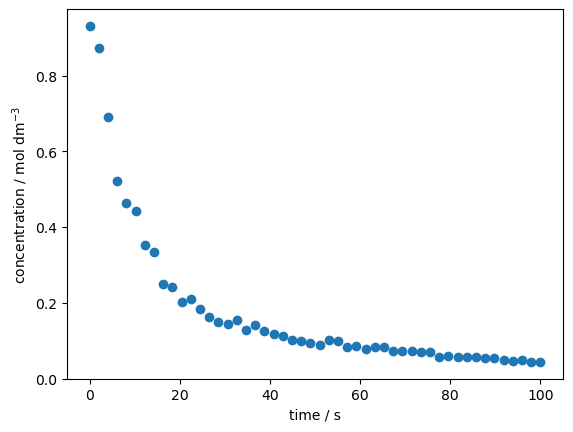

In [6]:
# Plot a scatter graph for time vs concentration
plt.scatter(t, A, label = "A")
plt.xlabel("time / s")
plt.ylabel("concentration / mol dm$^{-3}$")

**Question (1): Looking at this plot, do you think the reaction is zeroth order, first order or second order? There may be more than one possible answer!**

## Reaction orders

<!-- As you may know from A-level Chemistry, reactants in a chemical reaction can be zeroth, first or second order depending on how concentration varies with time. Looking back at the table of rate laws (and also repeated here again), you should be familiar with the first set of equations, the differentiated rate law where you can calculate the rate from the concentrations and rate constant, as well as the units for the rate constant (bottom row). The second set, the integrated rate law, may be new to you - but essentially this just integrates the first set of equations so that you can calculate the concentration of reactant at a given time, given you have the initial concentrations. The graphs for each order and type of rate law also each have distinctive shapes.

<!-- ![reaction rates](rate_laws_equations.png)

(from https://general.chemistrysteps.com/second-order-reactions/)

![reaction rates](rate_laws_graphs.png)

(from https://www.clutchprep.com/chemistry/integrated-rate-laws) -->

**Skills: creating new columns, integrated rate law plots**

Here are the rate laws again, for reference:

![reaction rates](reaction_rates.png)

Looking at our plot, the graph shape is likely to either be first order or second order since it shows curvature. However, in order to determine which one it is exactly, we will need to make use of the integrated rate laws mentioned earlier.

As a recap, the integrated rate equations for each order should produce straight line graphs. For a first order reaction, we plot $ln([A])$ as our $y$ vs $t$ as our $x$ and for a second order reaction, we plot $\frac{1}{[A]}$ as our $y$ vs $t$ as our $x$. 

We can plot both of these graphs, adding an extra column for these calculations, and see which graph gives a linear plot. We can't start variable names with numbers or have them contain operators like /, so we've named the variable for `1/[A]` to be `recA` (as short for 'reciprocal of A')

We'll first create these new columns which save the results of calculations done to existing columns. To calculate the natural log, we will need to import another library used for mathematical operations, `numpy`.

In [7]:
import numpy as np

We will preview our dataset again, and can see we now have 2 new columns:

In [8]:
data["ln([A])"] = np.log(data["[A] / mol dm⁻³"]) # np.log() is essentially the ln() function in maths
data["1/[A]"] = 1 / (data["[A] / mol dm⁻³"])
data.head()

,time / s,[A] / mol dm⁻³,ln([A]),1/[A]
0,0.000000,0.931115,-0.071373,1.073982
1,2.040816,0.871808,-0.137186,1.147041
2,4.081633,0.689588,-0.371661,1.450142
3,6.122449,0.523002,-0.648171,1.912040
4,8.163265,0.463176,-0.769648,2.159007


We will now plot the graphs:

Text(0, 0.5, '1 / ([A] / mol dm$^{-3}$)')

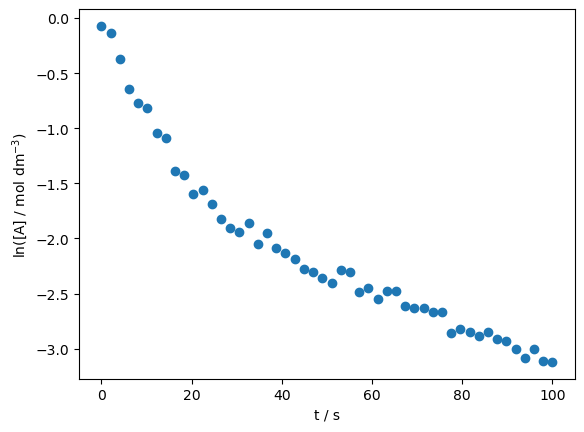

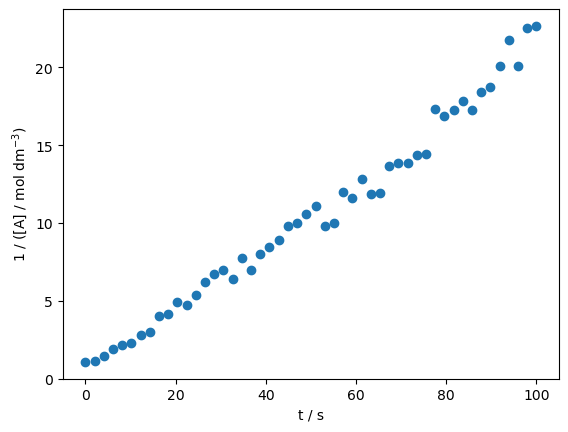

In [9]:
lnA = data["ln([A])"]
recA = data["1/[A]"]

fig, ax = plt.subplots()
ax.scatter(t,lnA)
ax.set_xlabel('t / s')
ax.set_ylabel('ln([A] / mol dm$^{-3}$)')

fig, ax = plt.subplots()
ax.scatter(t,recA)
ax.set_xlabel('t / s')
ax.set_ylabel('1 / ([A] / mol dm$^{-3}$)')

You will notice this time, instead of using `plt.scatter`, we use `fig, ax = plt.subplots()`and then `ax.scatter`. 

`plt.scatter` will act on the current figure/axes, so instead of plotting 2 separate graphs it will just plot on the same graph twice - which can be helpful in some cases but because we're using different measurements for our y axis it would not work. Therefore, we call `fig, ax = plt.subplots()` to create a new figure and axis using `plt.subplots()`, and plot on that specific `ax`.

**Question (2): Looking at these two plots, which appears to give a straighter line? Hence which order is the reaction most likely to be?**

**CLICK TO REVEAL ANSWER**

We can see that the second order graph appears to give a more linear plot, so this fits the linear equation better, and we can conclude that the reaction is second order with respect to reactant A.

## Extension 1 - using `scikit-learn` to determine $R^2$ values

**Skills: creating linear regression models, $R^2$ values**

We've seen visually, or _qualitatively_, that the reaction is most likely second order with respect to A. We can also use the statistical method we mentioned (linear regression) to verify this _quantitatively_, utilising the library `scikit-learn` by calculating an $R^2$ value. The $R^2$ value ranges from 0 to 1 and measures how well the model predicts the outcome (0 = very poor, 1 = very well). The more linear the graph, the better the model predicts the outcome.

There are several steps we need to take to set up and use the linear regression model:
1. Import the model from `scikit-learn` that we want to use (which is `LinearRegression()` in this case)
2. Prepare the data so that it is in a suitable format for the model - the training data is a two-dimensional object, so we want to represent x as a DataFrame.
3. Pass $X$ and $Y$ to the `fit()` method to train our model.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model_1 = LinearRegression(fit_intercept=True)

x = data[["time / s"]] # The double square brackets are needed because input features must be 2D
y = data['ln([A])']

model_1.fit(x, y)

R_squared_1 = model_1.score(x, y)
print(f"R squared is: {round(R_squared_1,3)}")

R squared is: 0.893


In [12]:
model_2 = LinearRegression(fit_intercept=True)

x = data[["time / s"]]
y = data['1/[A]']

model_2.fit(x, y)

R_squared_2 = model_2.score(x, y)
print(f"R squared is: {round(R_squared_2,3)}")

R squared is: 0.982


We can see that both graphs give pretty good $R^2$ values, however as model 2's value is closer to 1 so we can confirm that the reaction is indeed second order with respect to reactant A.

## Extension 2 - using `scikit-learn` to draw a line of best fit and predict concentrations at a given time

**Skills: using the linear regression outputs `.coef_` and `.intercept_`, manipulating rate equations**

We can now use `scikit-learn` again, but this time we use linear regression to predict the concentration of reactant at a given time. We can first find the gradient and y intercept from the model, which are the $m$ and $c$ values respectively of a $y = mx + c$ equation, and also plot a line of best fit from our straight line graph.

<!-- # # Run this cell as it is
# from sklearn import linear_model

# # Prepare the data
# X = data[["t"]]
# Y = data["1/[A]"]

# model = linear_model.LinearRegression(fit_intercept = True) # Create the model

# model.fit(X, Y) # Fit the model to the data

# data["pred_y"] = model.predict(X) # Use the model for prediction and create new column in the dataframe to store this

# # Output the results
# print("Line gradient from model: ", model.coef_[0])
# print("Line intercept from model:", model.intercept_) -->

In [13]:
print(f"Line gradient from model: {round(model_2.coef_[0],3)}")
print(f"Line intercept from model: {round(model_2.intercept_,3)}")

Line gradient from model: 0.207
Line intercept from model: 0.201


Text(0, 0.5, '1 / ([A] / mol dm$^{-3}$)')

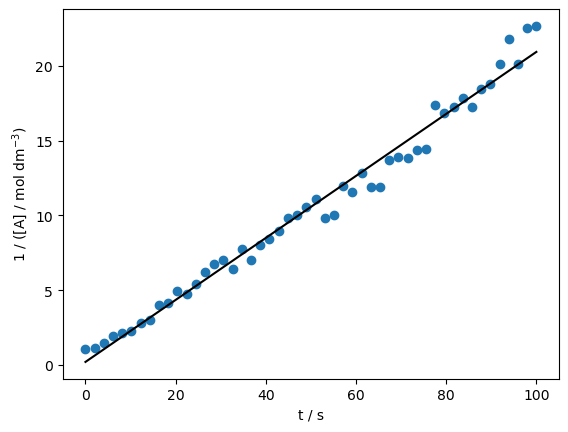

In [14]:
data["pred_y"] = model_2.predict(x) # Use the model for prediction and create new column in the dataframe to store this

lnA = data["ln([A])"]
recA = data["1/[A]"]
pred_Y = data["pred_y"]
fig, ax = plt.subplots()
ax.scatter(t,recA)
ax.plot(t,pred_Y,color = "black")
ax.set_xlabel('t / s')
ax.set_ylabel('1 / ([A] / mol dm$^{-3}$)')

We can see that Python has drawn a line of best fit for us, which is pretty cool.

Looking back at the integrated rate laws we discussed earlier, we can see that this line essentially represents the integrated rate law equation, which is $\frac{1}{[A]} = \frac{1}{[A]_0} + kt$. We can see that the intercept corresponds to the value of $\frac{1}{[A]_0}$, and the gradient corresponds to the value of $k$, which is our rate constant.
<!-- 
We can also see from the table that the units of $k$ are $M^{-1} s^{-1}$ (or $mol^{-1} dm^{3} s^{-1}$) for a second order reaction.

Let's verify this from the rate equation's units:

$rate = k[A]^2$

$mol dm^{-3} s^{-1} = (k) * (mol dm^{-3})^2$

$mol dm^{-3} s^{-1} = (k) * (mol dm^{-3}) * (mol dm^{-3})$

Cancelling out:

$s^{-1} = (k) * (mol dm^{-3})$

$(k) = s^{-1} / (mol dm^{-3})$

$(k) = (mol^{-1} dm^{3}) s^{-1}$

So the units of k are indeed $mol^{-1} dm^{3} s^{-1}$. -->

$\frac{1}{[A]} = \frac{1}{[A]_0} + kt$

Substituting the known constants:

$\frac{1}{[A]} = 0.201 + 0.208t$

So say we wanted to find the concentration of reactant A at 120 seconds:

$\frac{1}{[A]} = 0.201 + (0.208 * 120)$

$[A] = \frac{1}{0.201 + (0.208 * 120)}$

$\approx$ $0.0411$ $mol$ $dm^{-3}$

Let's double check this calculation by typing in the code:

In [15]:
pred_A = 1 / (model_2.coef_[0] + (model_2.intercept_ * 120))
print(f"The predicted concentration of reactant A at 120 seconds is {round(pred_A, 4)} mol dm⁻³")

The predicted concentration of reactant A at 120 seconds is 0.0411 mol dm⁻³


**Question (3): From inspection of the initial concentration vs time graph what do you estimate the concentration of reactant A to be at 20 seconds? Type in the code (using the above to help) and see if it matches the estimation.**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [16]:
## ADD TEXT HERE


## Bonus - bringing in B and C, and rolling averages

**Skills: using `.rolling()`, plotting multiple variables, legends**

The original data also contained concentrations for B and C. Let's read in this data, in a file called `concentrations_vs_time_extra.csv`.

In [17]:
data_extra_filename = "data/concentrations_vs_time_extra.csv" # Create variable to store the filename
data_extra = pd.read_csv(data_extra_filename, sep = ",") # Read in the data using pandas, specifying that the values are separated by a comma

In [18]:
# Create variables for each column in the dataframe
t = data_extra["time / s"]
A = data_extra["[A] / mol dm⁻³"]
B = data_extra["[B] / mol dm⁻³"]
C = data_extra["[C] / mol dm⁻³"]

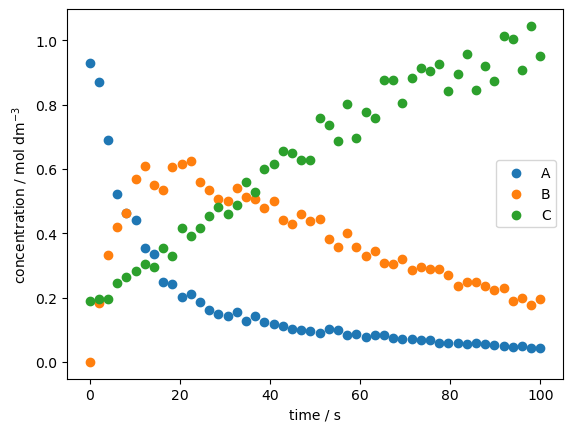

In [19]:
# Plot a scatter graph for time vs concentration
plt.scatter(t, A, label = "A")
plt.scatter(t, B, label = "B")
plt.scatter(t, C, label = "C")
plt.xlabel("time / s")
plt.ylabel("concentration / mol dm$^{-3}$")
plt.legend() # Adds a legend (key) to the plot to identify which points belong to which label
plt.show() # Ensures both the plot and legend are showing

**Question (4): Have a look at the plots - what role do you think B and C have?**

**CLICK TO REVEAL ANSWER**

Here from the graph, we can see that A is likely to be the reactant as it shows a decrease over time. C is likely to be the product as it shows an increase over time. B seems to show a mix of both, suggesting that it is an intermediate - formed when A reacts, and then reacting itself to form C.

The plot mainly shows clean trends, but we can see that for C the points become bunched together towards the end of the graph. We can use something called a rolling average to clean up the points.

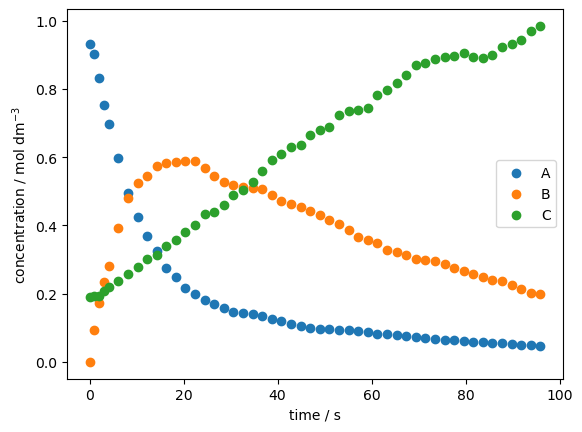

In [20]:
data_rolling_average = data_extra.rolling(5, min_periods = 1).mean() # try adjusting this number
t_rolling_average = data_rolling_average["time / s"]
A_rolling_average = data_rolling_average["[A] / mol dm⁻³"]
B_rolling_average = data_rolling_average["[B] / mol dm⁻³"]
C_rolling_average = data_rolling_average["[C] / mol dm⁻³"]
plt.scatter(t_rolling_average, A_rolling_average, label = "A")
plt.scatter(t_rolling_average, B_rolling_average, label = "B")
plt.scatter(t_rolling_average, C_rolling_average, label = "C")
plt.xlabel("time / s")
plt.ylabel("concentration / mol dm$^{-3}$")
plt.legend()
plt.show()

The parameter (value inside the brackets for `data_2.rolling()`) is the window that the rolling average is taken for. Say we are calculating the rolling average over a window of 5 rows of data - at the very beginning, there aren't yet 5 values to use and there will only be a point on the graph after 5 data points are in the window. As a solution, we can also set the `min_periods` - as the rolling average is only taken after the window number is reached there will be points missing to start off with so the `min_periods` parameter takes this into account. Something to note is that the larger the number, the smoother the plot becomes, but if the number is too large (such as 20), the graph begins to lose its shape.

**Question (5): Experiment with the parameters in the `.rolling()` function in the cell above, and then re-run it. Have a look at how the shape of the graph might be different.**